In [44]:
import numpy as np
import matplotlib.pyplot as plt

## Задача 1

Рассмотрим функцию f на отрезке [1, 15]:
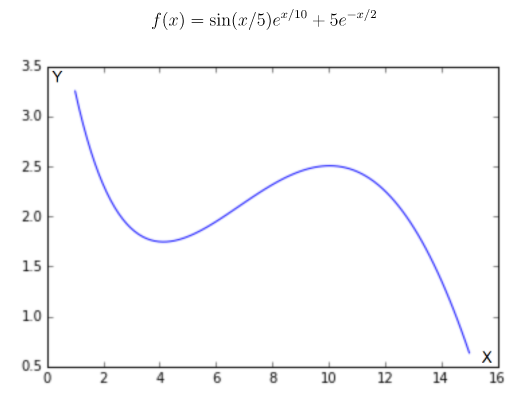

Мы хотим приблизить сложную зависимость многочленом. Как известно, многочлен степени n (то есть w0 + w1 x + w2 x2 + ... + wn xn) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w0, ..., wn можно определить из следующей системы линейных уравнений:  
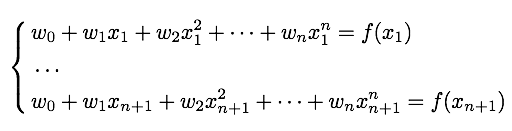


Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

1)Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции numpy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?  
2)Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?  
3)Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w0, w1, w2, w3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можно произвести округление до второго знака (т.е. до числа вида 0.42).

In [43]:
def f(x):
    return np.sin(x/5)*np.exp(x/10) + 5*np.exp(-x/2)

**Для полинома1**: (x1 = 1, x2 = 15)  
$w_0 + w_1 x_1 = f(x_1)$  
$w_0 + w_1 x_2 = f(x_2)$

In [66]:
A = np.array([[1, 1], [1, 15]])
b = np.array([f(1), f(15)])
w = np.linalg.solve(A, b)
w

array([ 3.43914511, -0.18692825])

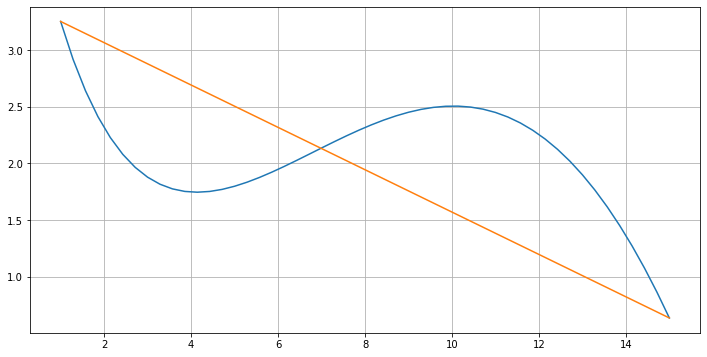

In [52]:
grid = np.linspace(1, 15, num=50)
plt.figure(figsize=(12, 6))
plt.plot(grid, f(grid))
plt.grid()

x = np.array([1, 15])
plt.plot(x, w[0]+w[1]*x)

Линейное приближение плохо приближает, потому что функция явно нелинейная. Но в заданных точках 1 и 15 - совпадает, что логично, через них же проводили.

**Для полинома2**: (x1 = 1, x2=8, x3 = 15)  
$w_0 + w_1 x_1 + w_2 x_1^2 = f(x_1)$  
$w_0 + w_1 x_2 + w_2 x_2^2 = f(x_2)$  
$w_0 + w_1 x_3 + w_2 x_3^2 = f(x_3)$  

In [67]:
x = np.array([1, 8, 15])
A = np.array([[1, 1, 1], x, x*x]).T
b = f(x)
w = np.linalg.solve(A, b)
w

array([ 3.32512949, -0.06531159, -0.00760104])

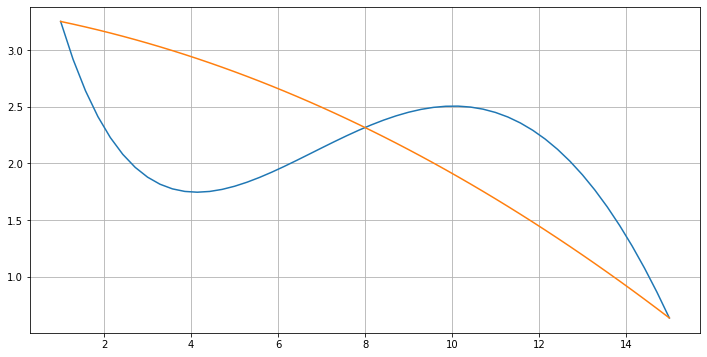

In [62]:
grid = np.linspace(1, 15, num=50)
plt.figure(figsize=(12, 6))
plt.plot(grid, f(grid))
plt.grid()

plt.plot(grid, w[0]+w[1]*grid+w[2]*grid*grid)

Квадратичное приближение тоже плохо приближает, потому что у функции два экстремума, значит, она как минимум 3 степени. Но в заданных точках 1, 8 и 15 - совпадает, что логично, через них же проводили.

**Для полинома3**: (x1=1, x2=4, x3=10, x4=15)  
$w_0 + w_1 x_1 + w_2 x_1^2 + w_3 x_1^3 = f(x_1)$  
$w_0 + w_1 x_2 + w_2 x_2^2 + w_3 x_2^3 = f(x_2)$  
$w_0 + w_1 x_3 + w_2 x_3^2 + w_3 x_3^3 = f(x_3)$  
$w_0 + w_1 x_4 + w_2 x_4^2 + w_3 x_4^3 = f(x_4)$ 

In [69]:
x = np.array([1, 4, 10, 15])
A = np.array([[1, 1, 1, 1], x, x*x, x*x*x]).T
b = f(x)
w3 = np.linalg.solve(A, b)
w3

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])

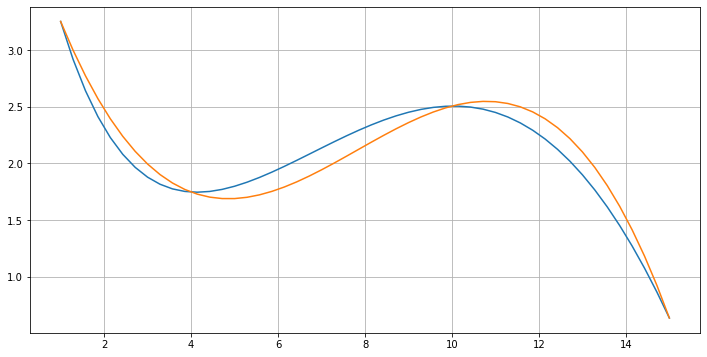

In [64]:
grid = np.linspace(1, 15, num=50)
plt.figure(figsize=(12, 6))
plt.plot(grid, f(grid))
plt.grid()

plt.plot(grid, w[0]+w[1]*grid+w[2]*grid*grid+w[3]*grid*grid*grid)

Кубическое приближение приближает функцию по виду и, очевидно, в заданных узлах. Но именно аппроксимации добиться не удалось.

In [70]:
print('коэфф кубического приближения:', np.round_(w3, decimals=2))

коэфф кубического приближения: [ 4.36 -1.3   0.19 -0.01]


## Задача 2:  
Есть два вектора одинаковой длины: x и y. Надо найти 1)количество позиций, для которых элементы в обоих векторах ненулевые. 2)Число позиций, для которых хотя бы в одном из двух векторов x и y есть ненулевой элемент

In [12]:
x = np.array([1, 5, 1, 1, 0, 1, 1])
y = np.array([0, 2, 0, 2, 0, 2, 0])

In [13]:
x_tru = (x!=0) #ненулевые значения на позициях...
y_tru = (y!=0)
x_tru, y_tru

(array([ True,  True,  True,  True, False,  True,  True]),
 array([False,  True, False,  True, False,  True, False]))

In [5]:
#можно запустить для демострации
x_tru + y_tru

array([ True,  True,  True,  True, False,  True,  True])

In [6]:
#можно запустить для демострации
np.logical_and(x_tru, y_tru).sum()

array([False, False, False,  True, False,  True, False])

In [14]:
print('1) позиций, где оба не_0: ', np.logical_and(x_tru, y_tru).sum())
print('2) позиций, где хотя бы один не_0: ', (x_tru + y_tru).sum())

1) позиций, где оба не_0:  3
2) позиций, где хотя бы один не_0:  6


## Задача 3:  
В векторе x надо повторить каждый элемент N раз подряд.

In [23]:
arr = [1, 2, 0]
N = 3

In [41]:
res = np.hstack(arr*N)
res = res.reshape((len(arr), -1))
res = res.T
res = res.reshape((1, -1))
res

array([[1, 1, 1, 2, 2, 2, 0, 0, 0]])

In [24]:
#Ну или так:
np.repeat(arr, N)

array([1, 1, 1, 2, 2, 2, 0, 0, 0])

## Задача 4:  
В векторе x надо найти максимальный элемент среди тех, перед которыми стоит ноль.

In [68]:
x = np.array([2, 0, 0, 5, 8, 0, 6])

In [69]:
x_shift = np.hstack(([x[-1]], x[:-1])) #x, сдвинутый вправо на 1
x_need = (x_shift==0) #номера элементов, перед которыми 0
res = x_need * x #тут не 0 только те, перед которыми в исходном стоял 0
print(np.max(res))

6


## Задача 5:  
В векторе x надо заполнить каждый нулевой элемент предыдущим ненулевым значением.

In [110]:
x = np.array([2, 0, 0, 5, 8, 0, 0, 6])

In [111]:
prev = np.arange(len(x))
prev[x == 0] = 0
prev = np.maximum.accumulate(prev)
x[prev]

array([2, 2, 2, 5, 8, 8, 8, 6])

## Задача 6

Надо вычислить приближённое значение функции f(x) = ln(1 + x) в точке x0 с помощью разложения в ряд Тейлора N-го порядка в окрестности нуля:  
$ln(1+x) = \sum_{n=1}^N \frac{(-1)^{n+1}x^n}{n}$

In [85]:
#input:
N=100
x0=1

In [96]:
ns = np.arange(1, N+1)
def Taylor(x0, n): # n-ное слагаемое ряда Тейлора
    return ((-1)**(n+1))*(x0**n)/n
res = Taylor(x0, ns).sum()
print('ln(1+%f) = %f in %d ord' %(x0, res, N))

ln(1+1.000000) = 0.688172 in 100 ord


## Задача 7

Дана матрица X «объекты-признаки» размера m x n: число строк m — это количество объектов, а число столбцов n — количество признаков. Каждая строка представляет собой описание объекта выборки в виде набора значений его признаков. Каждый же столбец содержит значения определённого признака на всех объектах выборки.  
Надо найти выборочное среднее и ковариационную матрицу выборки X, не пользуясь специальными numpy функциями mean и cov.

In [3]:
X = np.array([[175, 4], [20, 2], [25, 8]]) # 1 столбец - 1 признак
X

array([[175,   4],
       [ 20,   2],
       [ 25,   8]])

In [14]:
sums = X.sum(axis=0) #логично смотреть среднее по одному признаку
m=1
m, n = X.shape
mean = sums/m
print('sample mean:', mean)


mean: [73.33333333  4.66666667]


Определение матрицы ковариаций, где $\overline{x}$ - вектор-столбец выборочного среднего:  
$Q = \frac{1}{m-1} \sum^m_{i=1}(x_{i.}-\overline{x})(x_{i.}-\overline{x})^T$  
Здесь Х - наш $X^T$, т.к Q - матрица $n*n$, где n - кол-во признаков

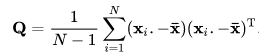

In [38]:
dev = X - np.reshape(np.repeat(mean, m), (n,-1)).T #deviation from mean
Q = np.dot(dev.T, dev)/(m-1)
print('sample covariation:\n', Q)

sample covariation:
 [[7758.33333333  -43.33333333]
 [ -43.33333333    9.33333333]]


In [19]:
#for comparing:
np.cov(X.T)

array([[7758.33333333,  -43.33333333],
       [ -43.33333333,    9.33333333]])